## Models

Test out the following models:
K-Mode Clustering
XGBoost
Random Forest
Isomapping

GLM not necessary potentially?

In [1]:
# Necessary imports
#The foundation
#The models will be imported as needed
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Calling out the stored variable for our models from the Pre-Processing Notebook
from sklearn import datasets
%store -r df

In [3]:
df.head()

,ram_gb,ssd_gb,hdd_gb,graphic_card_gb,display_size,latest_price,os_bit_64,brand_APPLE,brand_ASUS,brand_Avita,...,ram_type_DDR5,ram_type_LPDDR3,ram_type_LPDDR4,ram_type_LPDDR4X,os_Mac,os_Windows,weight_Gaming,weight_ThinNlight,msoffice_Yes,Binarize_Warranty
0,4,0,1024,0,15.6,324.87,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,4,0,512,0,15.6,254.67,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,4,128,0,0,15.6,259.87,1,0,0,1,...,0,0,0,0,0,1,0,1,0,0
3,4,128,0,0,15.6,279.37,1,0,0,1,...,0,0,0,0,0,1,0,1,0,0
4,4,256,0,0,15.6,324.87,1,0,0,1,...,0,0,0,0,0,1,0,1,0,0


In [17]:
#Create the dataset -> We are working with clustering so no need to create a train/test set
#X = df.drop('latest_price', axis = 1)
#y = df[['latest_price']]
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1234)

X = df
X.shape

(896, 75)

In [19]:
#Scale our X accordingly using MinMaxScaler
X_to_scale = ['ram_gb', 'ssd_gb', 'hdd_gb', 'graphic_card_gb']

#Initialize the MinMax Scaler
X_scaled = MinMaxScaler()

#Fit the X data for our numerical columns
X_scaled.fit(X[X_to_scale])

#Transform the X data for both the X_train and X_test
X_scaled = X_scaled.transform(X[X_to_scale])

#Convert these back to dataframes so we can add them back in
X_scaled = pd.DataFrame(X_scaled, index=X.index, columns = X_to_scale)
#X_test_scaled = pd.DataFrame(X_test_scaled, index=X_test.index, columns = X_to_scale)

In [20]:
#Add back in the columns
#All the other columns
X_other_columns = X.columns.drop(X_to_scale)

#Join from scaled to not-scaled
X = X_scaled.join(X[X_other_columns])

#Make sure we have no crazy join issues, we should have shape [896, 75] 
print(X.shape)

(896, 75)


In [21]:
#Start with K-Mode Clustering from: https://github.com/nicodv/kmodes
#Install using conda install -c conda-forge kmodes (on anaconda)
from kmodes import kmodes, kprototypes

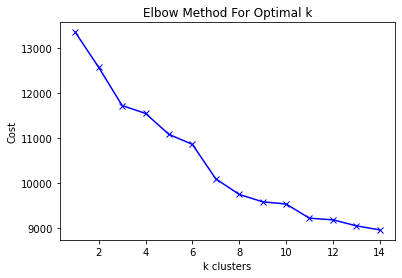

In [22]:
#We will initialize our model - documentation here: https://github.com/nicodv/kmodes/blob/master/kmodes/kprototypes.py
#We need to first see how many clusters would be ideal for our algorithm
#Also define the initialization method utilizing Cao's algorithm

cost =[]
K = range(1,15)
#categorical indices
categorical = list(range(5,74))
for num in list(K):
    kmodes = kprototypes.KPrototypes(n_clusters = num, init = 'Cao', n_init = 5);
    kmodes.fit_predict(X, categorical = categorical);
    cost.append(kmodes.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('k clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [23]:
#It seems that 11 clusters is the ideal grouping for our data
kmodes = kprototypes.KPrototypes(n_clusters = 11, init = 'Cao', n_init = 5);
kmodes.fit_predict(X, categorical = categorical);

In [24]:
kmodes.labels_

array([ 4,  4,  4,  4,  4,  7,  8,  4,  8,  4,  7,  7,  7,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  7,  0,  7,  6,  8,  8,  8,  7,
        8,  7,  7,  8,  7,  6,  7,  7,  6,  7,  7,  7,  7,  7,  7,  7,  4,
        7,  7,  7,  7,  7,  7,  7,  7,  4,  7,  7,  7,  7,  7,  7,  7,  4,
        7,  4,  7,  8,  6,  7,  7,  7,  7,  8,  7,  7,  8,  8,  4,  7,  8,
        7,  8,  8,  6,  8,  8,  6,  8,  4,  8,  7,  7,  7,  4,  8,  8,  7,
        7,  6,  6,  7,  7,  7,  8,  4,  7,  7,  7,  7,  6,  7,  7,  6,  7,
        7,  7,  7,  4,  7,  7,  7,  8,  7,  7,  7,  7,  6,  8,  6,  4,  6,
        7,  7,  4,  7,  7,  6,  7,  7,  4,  7,  6,  7,  7,  7,  7,  7,  6,
        7,  8,  7,  7,  0,  7,  8,  7,  6,  6,  8,  7,  7,  7,  7,  7,  7,
        8,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  7,  0,  8,  7,  7,
        8,  7,  8,  8,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  0,  7,
        7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  9,  9

## K Modes Thoughts

Although we were able to use K-Modes the inability to visualize or really understand the outputs of the clustering method makes it difficult to act upon. We're going to move on and try a different model.

-> potentially use price vs something else to interpret or pairwise at a time
https://openclassrooms.com/en/courses/5869986-perform-an-exploratory-data-analysis/6177861-analyze-the-results-of-a-k-means-clustering



## Isomapping

In [41]:
from sklearn.manifold import Isomap

model = Isomap(n_neighbors = 6, n_components = 3)
model.fit(X)
manifold_2Da = model.transform(X)
manifold_2D = pd.DataFrame(manifold_2Da, columns = ['Component 1', 'Component 2', 'Component 3'])

manifold_2D.head()

,Component 1,Component 2,Component 3
0,42.648041,13.867764,0.014783
1,42.289265,13.305504,-1.157411
2,42.324943,13.361320,-1.058680
3,42.444590,13.548600,-0.708766
4,42.647599,13.867077,0.013725


AttributeError: 'Isomap' object has no attribute 'get_feature_names_out'

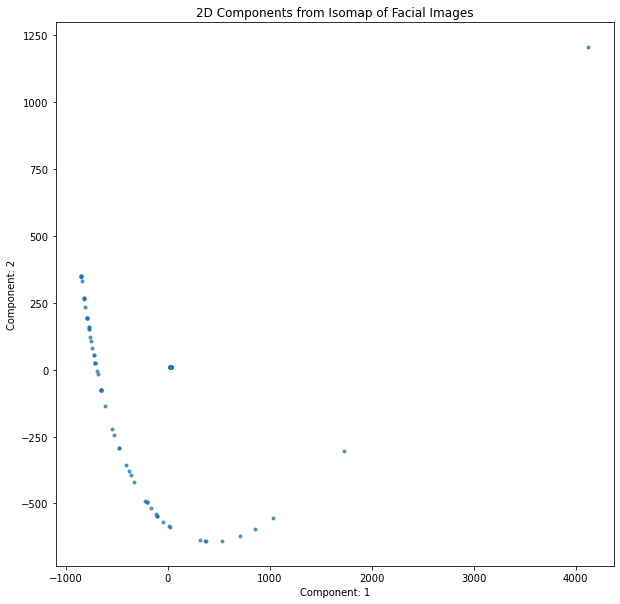

In [29]:
fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(111)
ax.set_title('3D Components from Isomap')
ax.set_xlabel('Component: 1')
ax.set_ylabel('Component: 2')
ax.scatter(manifold_2D['Component 1'], manifold_2D['Component 2'], marker='.',alpha=0.7)
plt.show()


<IPython.core.display.Javascript object>


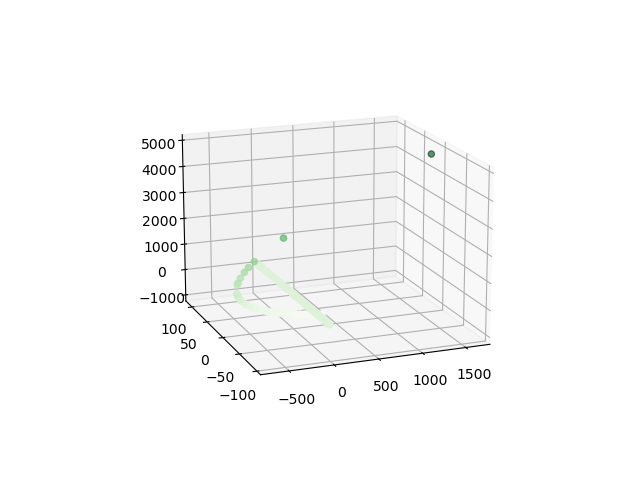

In [42]:
%matplotlib notebook
fig = plt.figure()
ax = plt.axes(projection='3d')

zdata = manifold_2D['Component 1']
xdata = manifold_2D['Component 2']
ydata = manifold_2D['Component 3']
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

## XGboost and Random Forest Time